# <center><font color= "#FA0246">Sentiment Analysis</font></center>

Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.A common use case for this technology is to discover how people feel about a particular topic.

<img src="./Sentiment_Analysis_Image.jpg" alt="Image of Sentiment Analysis" style="height:600px; width:400"/>

Sentiment Analysis is a widlely adopted practise allover the world. In fact, sentiment analysis is useful in several areas whether in politics where we can analyse attitudes to goverment agencies or in Business analytics where we can track customers reviews. Sentiment Analysis is also used in psychology, sociology, law making...etc.

# <font color='#B30233'>Project Context</font>
This project is about people's reviews on social media concerning a famous Tunisian football player Youssef Msakni. 
Youssef Msakni (born 28 October 1990) is a Tunisian professional footballer who plays for Qatar Stars League club Al-Duhail.
He was formed at Stade Tunisien, he evolves in July 2008 in the club of the ES Tunis. On November 17, he played his last game with ES Tunis but also his second final of the CAF Champions League against Al Ahly.

<img src="./youssef_msakni.jpg" alt="Youssef Mskani" style="width:400px;height:600px"/>
<b>Career :<b>
<ul>
 <li><strong>2017 : </strong>2018 FIFA World Cup qualification</li>
 <li><strong>2017 : </strong>2017 Africa Cup of Nations</li>
 <li><strong>2015 : </strong>2015 Africa Cup of Nations</li>
 <li><strong>2013: </strong>2013 Africa Cup of Nations</li>
  <li><strong>2011 : </strong>Tunisian Cup with Esperance of Tunis.</li>
 <li><strong>2009, 2010, 2011, 2012 : </strong>Champion of Tunisia with Esperance of Tunis.</li>

</ul>


# <font color='#B30233'>Data Description</font>
For our project, we collected data about Youssef Msakni from his official Facebook page and from Youtube Videos using Youtube and Facebook APIs.
This data is essentially the people's reviews of the posts, photos and videos concerning Youssef in the Tunisian Dialect dating back to year 2016, 2017 and 2018. 
We presented our data as a CSV file conntaing four columns : text_comment, sentiment_category, date, url where sentiment_category can be either positif or negatif.


### Import necessary libraries


In [1]:
## Import entire libraries
import pandas as pd
import numpy as np

#library for plotting stuff
import matplotlib.pyplot as plt
#so that plots appear in the same browser window
%matplotlib inline


## Import specific items only from the sklearn library
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

# <font color='#B30233'>Data preprocessing</font>
In this section, we are going to import our raw data, to create a new binary sentiment category and to split the data into train and test sets.

### Get raw data

In [2]:
# Read the data from a CSV file
data = pd.read_csv('./youssef_msakni.csv')

In [3]:
#Displaing the first 5 comments 
print(data.shape)
data.head()

(409, 4)


,comment_text,sentiment_category,date,url
0,Sa77a nemes mnawer frr,positif,2017-10-11T01:14:34+0000,https://www.facebook.com/YoussefMsekni.fans/ph...
1,pff,negatif,2011-12-26T09:39:58+0000,https://www.facebook.com/Youssef.28.Msakni/pho...
2,le meilleur joueur de la tunisie cest msakni,positif,2017-05-18T18:33:41.000Z,https://www.youtube.com/watch?v=KV2WpPMM90E
3,Yassir tfaded,negatif,2017-11-13T18:20:15+0000,https://www.facebook.com/YoussefMsekni.fans/ph...
4,M3allem,positif,2017-12-22T08:43:10+0000,https://www.facebook.com/Youssef.7.Msekni/phot...


### Create new binary sentiment category variable
We are creating here a new binary sentiment category where every positif comment has the value 1 and every negatif comment has the value 0.

In [4]:
# Create new binary sentiment_category variable:
#   = 1 if rating == 'positif'
#   = 0 if rating == 'negatif'
z = np.where(data['sentiment_category'] =='positif', 1, 0)
data['sentiment_category_Binary'] = z

In [5]:
# Print the size of each binary sentiment_category
gR = data.groupby('sentiment_category_Binary').size()
print(type(gR))
gR

<class 'pandas.core.series.Series'>


sentiment_category_Binary
0     97
1    312
dtype: int64

<Container object of 2 artists>

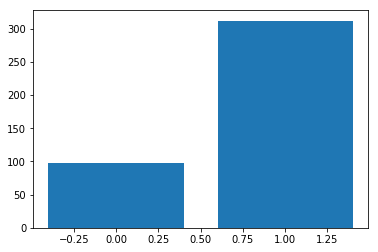

In [6]:
plt.bar(gR.index, gR)

In [7]:
#Some positive examples
data[data['sentiment_category_Binary'] == 1].head(5)

,comment_text,sentiment_category,date,url,sentiment_category_Binary
0,Sa77a nemes mnawer frr,positif,2017-10-11T01:14:34+0000,https://www.facebook.com/YoussefMsekni.fans/ph...,1
2,le meilleur joueur de la tunisie cest msakni,positif,2017-05-18T18:33:41.000Z,https://www.youtube.com/watch?v=KV2WpPMM90E,1
4,M3allem,positif,2017-12-22T08:43:10+0000,https://www.facebook.com/Youssef.7.Msekni/phot...,1
5,aller Yuossef,positif,2017-07-05T02:20:51.000Z,https://www.youtube.com/watch?v=i2WUo3tzM6Y,1
6,Mnawer ya msakni,positif,2017-10-10T17:22:00+0000,https://www.facebook.com/YoussefMsekni.fans/ph...,1


In [8]:
# Some negative examples
data[data['sentiment_category_Binary'] == 0].head(5)


,comment_text,sentiment_category,date,url,sentiment_category_Binary
1,pff,negatif,2011-12-26T09:39:58+0000,https://www.facebook.com/Youssef.28.Msakni/pho...,0
3,Yassir tfaded,negatif,2017-11-13T18:20:15+0000,https://www.facebook.com/YoussefMsekni.fans/ph...,0
11,Far5 cha9nous,negatif,2017-11-19T21:27:25+0000,https://www.facebook.com/Youssef.7.Msekni/phot...,0
14,hetha el cha5ss min anwe3 el 7atharet el nadra,negatif,2017-09-15T14:05:55.000Z,https://www.youtube.com/watch?v=YXGdt6ppv5c,0
18,moch rajel w 9oaalit el rojlla,negatif,2017-07-25T19:43:26.000Z,https://www.youtube.com/watch?v=YXGdt6ppv5c,0


### Split data into train and test sets

In [9]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(data['comment_text'], 
                                                    data['sentiment_category_Binary'], 
                                                    random_state=591)
print(X_train.shape)
print(X_test.shape)

(306,)
(103,)


In [10]:
#Some train examples
X_train.head(10)

265    J'adorerais voir cette été msakni a l'om ou o ...
279                                   hĥhhhhh ya youssif
74                                      Rabi yhanik Nems
96                Faraahna ya youssef fi l mondiale !! ❤
322                               Sadkouni hkéytou férga
346                       Bon année ya nems ya 4ali❤❤❤❤❤
240                                               Mahlek
89                                  best so proud of him
53                                       Nîmes ya m3alem
248                                     yezi mel tbourib
Name: comment_text, dtype: object

# <font color='#B30233'>Implementing our Sentiment Analyzer </font>
After preprocessing our data, the first step to begin with in our Sentiment Analyzer is to tokenize our data and construct our vocabulary set. 

## Tokenize documents & build vocabulary set
This step could be done using the CountVectorizer class or the TfidVectorizer class. 

### <font color='#A79533'>1- Using CountVectorizer with default parameters</font>

##### <font color='#H69533'>a/ Create CountVectorizer instance </font>

In [11]:
vect = CountVectorizer()

# Fit the CountVectorizer to the training data
# Learn the vocabulary (distinct words) of the input corpus
vect.fit(X_train)
print (len(vect.get_feature_names()))

766


##### <font color='#H69533'>b/Construct document-term matrix</font>
In the second step, we extract features that represent raw text documents as numerical feature vectors.
With the feature vectors and a given set of raw documents, we construct the document-term matrix


In [12]:
# The document-term matrix for the training corpus
X_train_vectorized = vect.transform(X_train)
print(X_train_vectorized.shape)
# The document-term matrix for the testing corpus
X_test_vectorized = vect.transform(X_test)
print(X_test_vectorized.shape)

(306, 766)
(103, 766)


### <font color='#A79533'>2- Using CountVectorizer with max_features=10 and  min_df=0.1 </font>

##### <font color='#H69533'>a/ Create CountVectorizer instance </font>

In [13]:
vect1 = CountVectorizer(max_features=10, min_df=0.1)

# Fit the CountVectorizer to the training data
# Learn the vocabulary (distinct words) of the input corpus
vect1.fit(X_train)
print (len(vect.get_feature_names()))

766


##### <font color='#H69533'>b/Construct document-term matrix</font>
In the second step, we extract features that represent raw text documents as numerical feature vectors.
With the feature vectors and a given set of raw documents, we construct the document-term matrix


In [14]:
# The document-term matrix for the training corpus
X_train_vectorized_1 = vect1.transform(X_train)
print(X_train_vectorized_1.shape)
# The document-term matrix for the testing corpus
X_test_vectorized_1 = vect1.transform(X_test)
print(X_test_vectorized_1.shape)

(306, 1)
(103, 1)


### <font color='#A79533'>3- Using TfidfVectorizer</font> 

##### <font color='#H69533'>a/ Create TfidfVectorizer instance </font>

In [15]:
#create class instance
tf_vect = TfidfVectorizer(use_idf = True)

##### <font color='#H69533'>b/ Tokenizing and constructing vocabulary</font>

In [16]:
#tokenize and construct vocabulary by calling fit() method
tf_vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

##### <font color='#H69533'>c/ Constructing tf-idf feature matrix for the training corpus</font>

In [17]:
#construct tf-idf feature matrix for the training corpus
tf_vect.fit(X_train)
train_tf_mat = tf_vect.transform(X_train)

In [18]:
train_tf_mat.shape


(306, 766)

In [19]:
print(train_tf_mat)

  (0, 765)	0.350158081134
  (0, 670)	0.350158081134
  (0, 538)	0.309932172673
  (0, 532)	0.350158081134
  (0, 469)	0.213699031016
  (0, 186)	0.350158081134
  (0, 161)	0.350158081134
  (0, 139)	0.350158081134
  (0, 70)	0.350158081134
  (1, 746)	0.667675785597
  (1, 704)	0.329269024741
  (1, 265)	0.667675785597
  (2, 731)	0.742512675086
  (2, 552)	0.431694212785
  (2, 502)	0.51216699814
  (3, 745)	0.341284931489
  (3, 704)	0.263764573031
  (3, 458)	0.573380221827
  (3, 224)	0.39550358783
  (3, 215)	0.573380221827
  (4, 581)	0.57735026919
  (4, 259)	0.57735026919
  (4, 239)	0.57735026919
  (5, 704)	0.461414380475
  (5, 502)	0.345935469759
  :	:
  (300, 321)	0.200199386156
  (300, 287)	0.214621999841
  (300, 278)	0.214621999841
  (300, 218)	0.214621999841
  (300, 108)	0.214621999841
  (300, 107)	0.214621999841
  (300, 0)	0.214621999841
  (301, 334)	0.707106781187
  (301, 65)	0.707106781187
  (302, 529)	0.555565250983
  (302, 356)	0.527168044798
  (302, 325)	0.471928158701
  (302, 274)	0.43

In [20]:
test_tf_mat = tf_vect.transform(X_test)
print(X_test)

262                etfaker el mout hezha em3ak rak tansa
9                                                Nemms❤❤
352    Continue comme ça frère inchallah plus d'abonn...
37                                 best player in africa
376              il sont trop beau Machaallah 😘 💕 💖 💞💟💜💗
288                                                 Nems
405                                       Mnawer ya chi5
174                                 Mhlkom nbo zinkom😘😘😘
161                    i love you Yousef Msakni <3<3<3<3
358                                      sayib rou7k 3ad
257                                      yassir fasadtha
320                                          rabi izidou
131                                             ya tafeh
193                     Ya3tek essa7a Yousef bon courage
184                                       ♥♥ mséknyyy ♥♥
91                                  We7dek ye m3elem😆😄👏😘
271                                            ya baiou3
323                            

## Approaches used in classification models

Existing approaches to sentiment analysis can be grouped into three main categories: 
<ul>
<li>Knowledge-based techniques</li>
<li>Statistical methods</li>
<li>Hybrid approaches</li>
</ul>

<strong>Knowledge-based techniques</strong> classify text by affecting categories based on the presence of unambiguous affect words such as happy, sad, afraid, and bored.
Some knowledge bases are not only a list containing obvious affect words, but also arbitrary words with a probable "affinity" to particular emotions.

<strong>Statistical methods</strong> leverage on elements from machine learning such as latent semantic analysis, support vector machines and "bag of words". More sophisticated methods try to detect the holder of a sentiment (i.e., the person who maintains that affective state) and the target (i.e., the entity about which the affect is felt). To mine the opinion in context and get the feature about which the speaker has opined, the grammatical relationships of words are used. Grammatical dependency relations are obtained by deep parsing of the text.

<strong>Hybrid approaches</strong> leverage on both machine learning and elements from knowledge representation such as ontologies and semantic networks in order to detect semantics that are expressed in a subtle manner.

In our case we have choose <strong>Statistical methods</strong> such as <strong>Logistic Regression</strong> and <strong>Naive Bayes</strong>.



## <font color = '#7B0A29'>Build classification model using Logistic Regression</font>


### <font color='#A79533'>1/ Using the feature vectors of the training documents deducted from countVectorizer with default parameters </font>
We are going to to build a classification model using the feature vectors of the training documents (which are stored in the variable X_train_vectorized) and their corresponding true sentiment categories (which are stored in the variable Y_train).

##### <font color='#H69533'> a/ Training the model using Logistic Regression method </font>

In [21]:
# Train the model using Logistic Regression method
LR_model = LogisticRegression()
LR_model.fit(X_train_vectorized, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### <font color='#H69533'> b/ Test the classification model</font>
We'll use the obtained Logistic Regression model to predict sentiment categories (classes) of test documents.

In [22]:
# Use this model to predict the sentiment category of test documents
LR_predictions = LR_model.predict(X_test_vectorized)
print(type(LR_predictions))
print(LR_predictions.shape)

<class 'numpy.ndarray'>
(103,)


In [23]:
print(LR_predictions[:30])
print(np.array(Y_test[:30]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1]
[0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0]


##### <font color='#H69533'> c/ Evaluating performance of classification model</font>

In [24]:
LR_classif_rate = accuracy_score(Y_test, LR_predictions)
LR_classif_rate

0.84466019417475724

##### <font color='#H69533'> d/ Interpretation of model's coefficients (parameters)</font>
Which vocabulary words are most important in our classification model?

In [25]:
# First get LR model's coefficient (there is one coefficient per vocabulary word)
coefs = LR_model.coef_[0]

# Sort these coefficient values in ascending order
sorted_coef_index = coefs.argsort()  # sort by actual value
sorted_coef_index_2 = abs(coefs).argsort()  # sort by absolute value

In [26]:
# Display the 10 smallest and 10 largest coefficients

# Feature_names = vect.get_feature_names()
feature_names = np.array(vect.get_feature_names())

print('Smallest Coefs of LR model:\n')
print(' Coefficient values:\n{}\n'.format(coefs[sorted_coef_index[:10]]))
print(' Feature names:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))

print('Largest Coefs of LR model:\n')
print(' Coefficient values: \n{}'.format(coefs[sorted_coef_index[:-11:-1]]))
print(' Feature names: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

print('Smallest abs(Coefs):\n')
print(' Coefficient values:\n{}\n'.format(coefs[sorted_coef_index_2[:10]]))
print(' Feature names:\n{}\n'.format(feature_names[sorted_coef_index_2[:10]]))

Smallest Coefs of LR model:

 Coefficient values:
[-1.26411619 -1.24989107 -1.03605374 -0.91962515 -0.85581248 -0.84590117
 -0.81275124 -0.78384898 -0.77890546 -0.77890546]

 Feature names:
['rajel' 'malla' 'tfouuuhhh' 'jabri' 'mel' 'yezi' 'el' 'mrith' 'tfaded'
 'yassir']

Largest Coefs of LR model:

 Coefficient values: 
[ 1.20263284  1.13533373  0.95875918  0.82230023  0.70018282  0.69282467
  0.65914228  0.65006848  0.62453019  0.58186264]
 Feature names: 
['rabi' 'm3alem' 'nems' 'bravo' 'm3allem' 'msekni' 'mnawer' 'the' 'youssef'
 'saha']
Smallest abs(Coefs):

 Coefficient values:
[ 0.0033895   0.0033895   0.0033895   0.01053676  0.01053676  0.01053676
  0.01053676  0.01053676  0.01053676  0.01053676]

 Feature names:
['europa' 'africa' 'america' 'wled' '3endha' 'kifkom' 'tefta5er'
 'nousourna' 'rfe3toulna' 'rousna']



### <font color='#A79533'>2/ Using the feature vectors of the training documents deducted from countVectorizer with max_features=10 and min_df=0.1 </font>
We are going to to build a classification model using the feature vectors of the training documents (which are stored in the variable X_train_vectorized_1) and their corresponding true sentiment categories (which are stored in the variable Y_train).

##### <font color='#H69533'> a/ Training the model using Logistic Regression method </font>

In [27]:
# Train the model using Logistic Regression method
LR_model_1 = LogisticRegression()
LR_model_1.fit(X_train_vectorized_1, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### <font color='#H69533'> Testing the classification model</font>
We'll use the obtained Logistic Regression model to predict sentiment categories (classes) of test documents.

In [28]:
# Use this model to predict the sentiment category of test documents
LR_predictions_1 = LR_model_1.predict(X_test_vectorized_1)
print(type(LR_predictions_1))
print(LR_predictions_1.shape)

<class 'numpy.ndarray'>
(103,)


In [29]:
print(LR_predictions_1[:30])
print(np.array(Y_test[:30]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0]


##### <font color='#H69533'>b/ Evaluating performance of classification model </font>

In [30]:
LR_classif_rate_1 = accuracy_score(Y_test, LR_predictions_1)
LR_classif_rate_1

0.76699029126213591

##### <font color='#H69533'>c/ Interpretation of model's coefficients (parameters)</font>
Which vocabulary words are most important in our classification model?

In [31]:
# First get LR model's coefficient (there is one coefficient per vocabulary word)
coefs_1 = LR_model_1.coef_[0]

# Sort these coefficient values in ascending order
sorted_coef_index_1 = coefs_1.argsort()  # sort by actual value
sorted_coef_index_3 = abs(coefs_1).argsort()  # sort by absolute value

In [32]:
# Display the 10 smallest and 10 largest coefficients

# Feature_names = vect.get_feature_names()
feature_names_1 = np.array(vect1.get_feature_names())

print('Smallest Coefs of LR model:\n')
print(' Coefficient values:\n{}\n'.format(coefs_1[sorted_coef_index_1[:10]]))
print(' Feature names:\n{}\n'.format(feature_names_1[sorted_coef_index_1[:10]]))

print('Largest Coefs of LR model:\n')
print(' Coefficient values: \n{}'.format(coefs_1[sorted_coef_index_1[:-11:-1]]))
print(' Feature names: \n{}'.format(feature_names_1[sorted_coef_index_1[:-11:-1]]))

print('Smallest abs(Coefs):\n')
print(' Coefficient values:\n{}\n'.format(coefs_1[sorted_coef_index_3[:10]]))
print(' Feature names:\n{}\n'.format(feature_names_1[sorted_coef_index_3[:10]]))

Smallest Coefs of LR model:

 Coefficient values:
[ 0.23582509]

 Feature names:
['ya']

Largest Coefs of LR model:

 Coefficient values: 
[ 0.23582509]
 Feature names: 
['ya']
Smallest abs(Coefs):

 Coefficient values:
[ 0.23582509]

 Feature names:
['ya']



## <font color = '#7B0A29'> Build classification model using Naive Bayes</font>

In [33]:
## Build Naive Bayes classification model
NB_model = MultinomialNB()
NB_model.fit(X_train_vectorized, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
## Use this model to predict sentiment of test documents

NB_predictions = NB_model.predict(X_test_vectorized)

### Evaluate performance of classification model

In [35]:
## calculate model's classification rate on the test corpus

NB_classif_rate = accuracy_score(Y_test, NB_predictions)
NB_classif_rate

0.87378640776699024

# <font color='#B30233'>Evaluation</font>
The accuracy of a sentiment analysis system is mainly how well it agrees with human judgments. This is usually measured by variant measures based on precision and recall over the two target categories of negative and positive texts.

Thus, a program which achieves <strong>70%</strong> accuracy in classifying sentiment is doing nearly as well as humans, even though such accuracy may not sound impressive. If a program were "right" <strong>100%</strong> of the time, humans would still disagree with it about <strong>20%</strong> of the time, since they disagree that much about any answer.

In our case the<strong> accuracy</strong > is :
<ul>
<li><strong>0.84466019417475724</strong> for our Classification Model build with <strong>Linear Regression</strong></li>
<li><strong>0.87378640776699024</strong> for our Classification Model build with<strong> Naive Bayes</strong></li>
</ul>